In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv(r"C:\Users\varat\OneDrive\Desktop\Jnotebook proj\yield_df.csv")

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
print(f"Total number of rows is {df.shape[0]} and total number of columns is {df.shape[1]}")

Total number of rows is 28242 and total number of columns is 8


In [5]:
print(df['Unnamed: 0'].nunique())
print(df['Unnamed: 0'].duplicated().sum())

28242
0


In [6]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.describe(include='all')

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242,28242,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
unique,101,10,NaN,NaN,NaN,NaN,NaN
top,India,Potatoes,NaN,NaN,NaN,NaN,NaN
freq,4048,4276,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,NaN,NaN,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,NaN,NaN,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,NaN,NaN,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,NaN,NaN,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,NaN,NaN,2008.000000,104676.750000,1668.00000,48687.880000,26.000000


In [9]:
df.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [10]:
print(df['Area'].unique())
print(df['Area'].nunique())

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

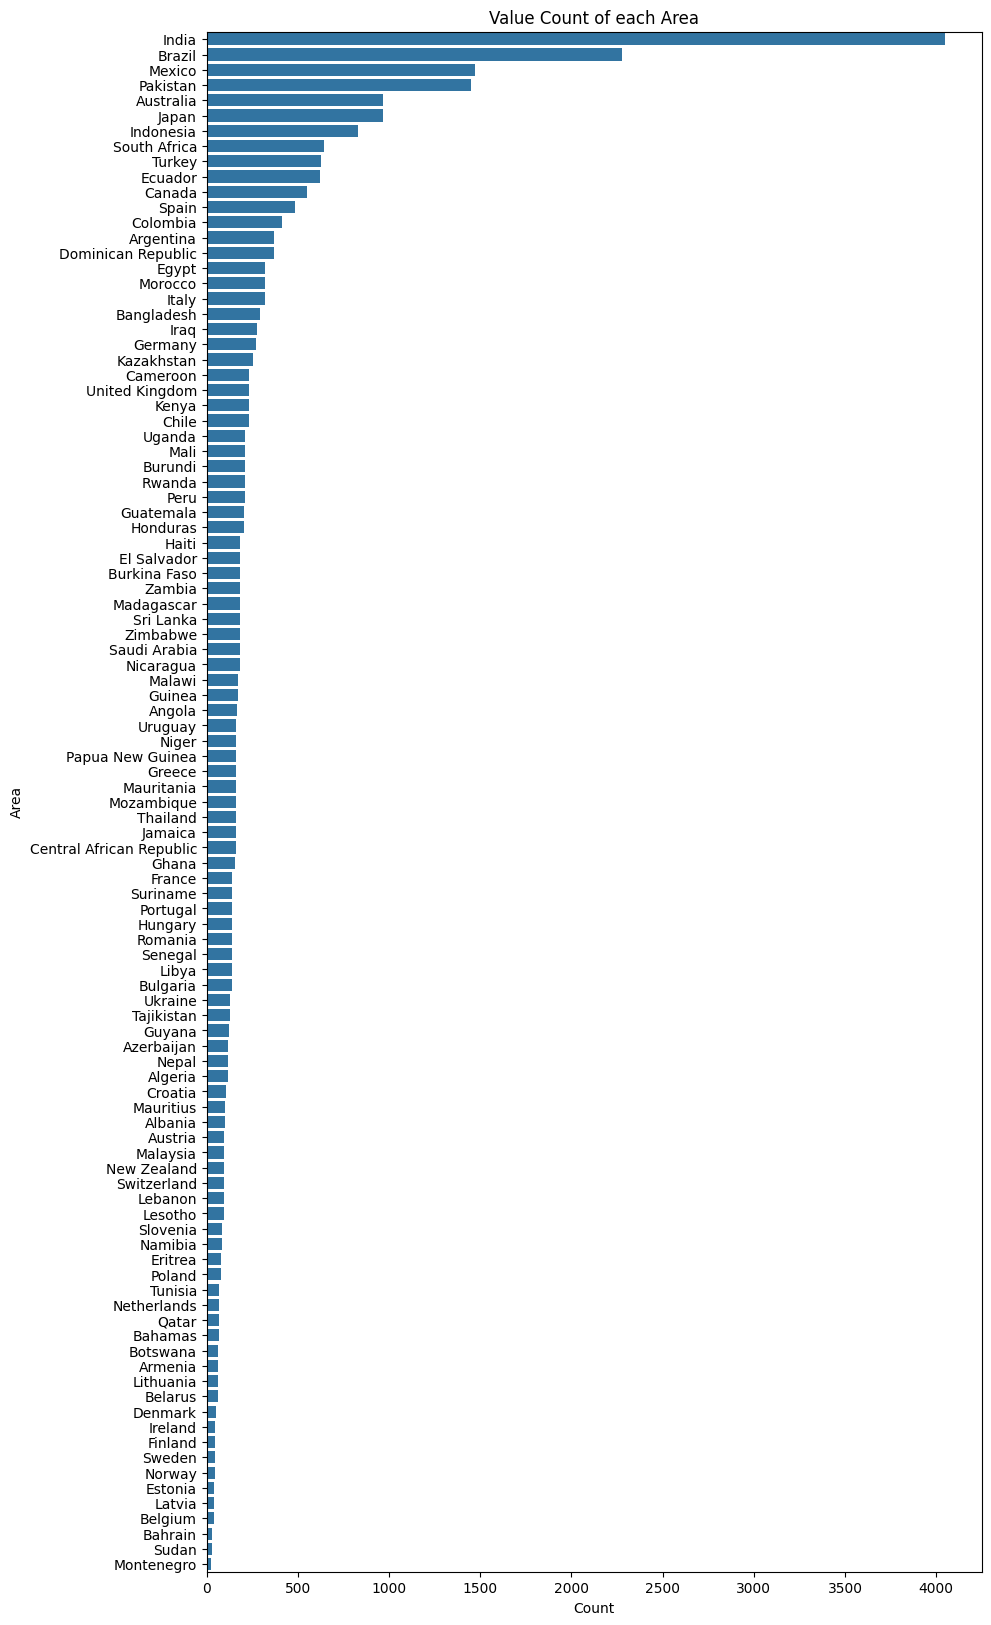

In [11]:
value_count_area = df['Area'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x = value_count_area.values,y= value_count_area.index)
plt.title('Value Count of each Area')
plt.xlabel('Count')
plt.show()

In [12]:
print(df['Item'].unique())
print(df['Item'].nunique())

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']
10


<Axes: ylabel='Item'>

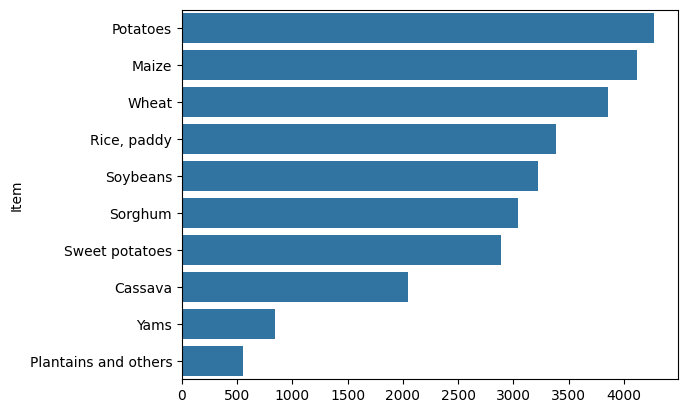

In [13]:
value_count_item = df['Item'].value_counts().sort_values(ascending=False)
sns.barplot(x= value_count_item.values,y=value_count_item.index)

In [14]:
print(df['Year'].min())
print(df['Year'].max())

1990
2013


In [15]:
df['Year'].value_counts()

Year
2012    1260
2013    1259
2011    1245
2010    1245
2008    1244
2006    1243
2007    1242
2009    1242
2005    1235
2004    1234
2000    1230
2001    1229
2002    1228
1998    1224
1997    1224
1993    1223
1999    1223
1996    1222
1995    1222
1994    1221
1992    1219
1990    1164
1991    1164
Name: count, dtype: int64

In [16]:
print(df['hg/ha_yield'].min())
print(df['hg/ha_yield'].max())
print(df['hg/ha_yield'].nunique())

50
501412
11514


In [17]:
print(df['average_rain_fall_mm_per_year'].min())
print(df['average_rain_fall_mm_per_year'].max())
print(df['average_rain_fall_mm_per_year'].nunique())

51.0
3240.0
100


In [18]:
print(df['pesticides_tonnes'].min())
print(df['pesticides_tonnes'].max())
print(df['pesticides_tonnes'].nunique())

0.04
367778.0
1673


In [19]:
print(df['avg_temp'].min())
print(df['avg_temp'].max())
print(df['avg_temp'].nunique())

1.3
30.65
1831


In [20]:
df.rename(columns={'Area':'Country','Item':'Crop', 'hg/ha_yield':'hg_ha_yield' }, inplace=True)

In [21]:
max_hg_ha_yield =df.groupby('Country')['hg_ha_yield'].max().sort_values(ascending=False).head()
max_hg_ha_yield

Country
Belgium        501412
New Zealand    495751
Switzerland    487219
France         468991
Netherlands    463376
Name: hg_ha_yield, dtype: int64

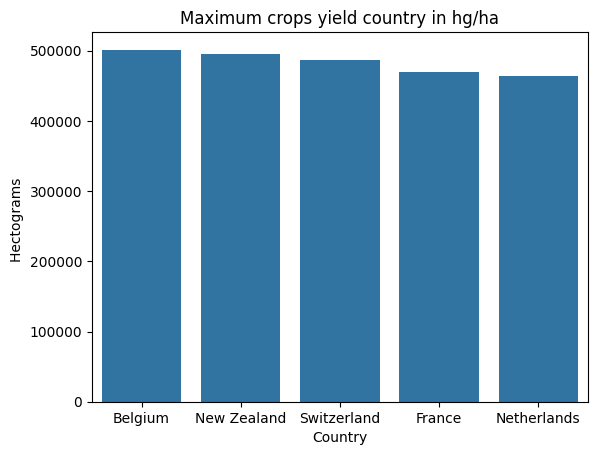

In [22]:
sns.barplot(x=max_hg_ha_yield.index,y=max_hg_ha_yield.values)
plt.title('Maximum crops yield country in hg/ha')
plt.ylabel('Hectograms ')
plt.show()

In [23]:
min_hg_ha_yield =df.groupby('Country')['hg_ha_yield'].min().sort_values(ascending=False).head()
min_hg_ha_yield

Country
Bahrain           100000
Belgium            78908
Ireland            68056
United Kingdom     66571
Sweden             53249
Name: hg_ha_yield, dtype: int64

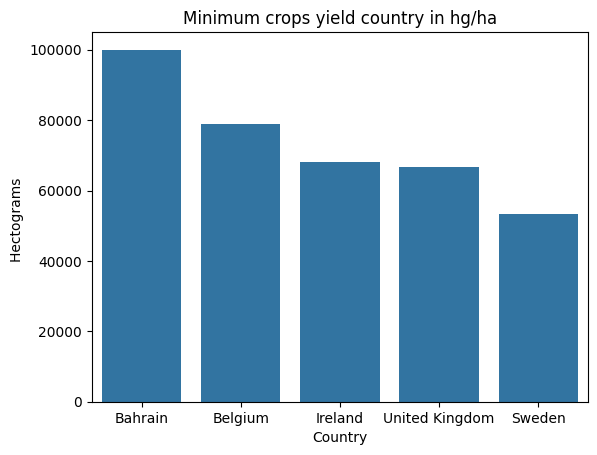

In [24]:
sns.barplot(x=min_hg_ha_yield.index,y=min_hg_ha_yield.values)
plt.title('Minimum crops yield country in hg/ha')
plt.ylabel('Hectograms ')
plt.show()

In [25]:
df.groupby("Country")['pesticides_tonnes'].max().sort_values(ascending=False).head()

Country
Brazil       367778.00
Argentina    171945.54
Colombia     117881.45
France       114695.00
Italy        100596.40
Name: pesticides_tonnes, dtype: float64

In [26]:
item = df['Crop'].unique()
yield_per_item = []
for i in item:
    yield_per_item.append(df[df['Crop']==i]['hg_ha_yield'].sum())

<Axes: >

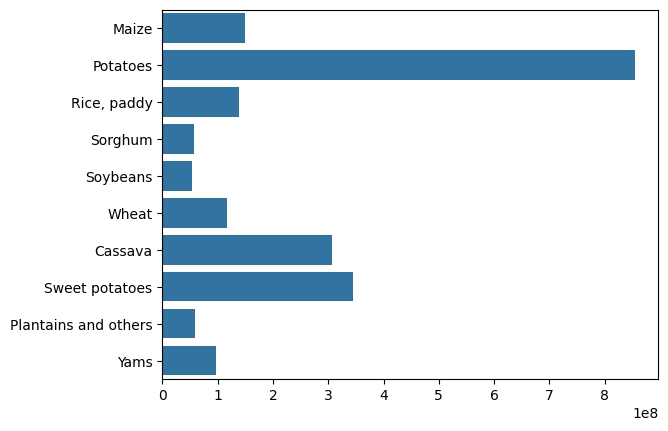

In [27]:
sns.barplot(y=item, x=yield_per_item)

In [31]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Country', 'Crop', 'hg_ha_yield']
df = df[col]
X = df.drop(columns='hg_ha_yield',axis=1)
y = df['hg_ha_yield']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, shuffle=True)

In [33]:
ohe = OneHotEncoder(drop='first')
sc = StandardScaler()
preprocesser =ColumnTransformer(
    transformers=[
        ('StandardScale', sc, [0, 1, 2, 3]),
        ('OneHotEncoder', ohe, [4,5]),
    ],
    remainder='passthrough'
)

In [34]:
X_train = preprocesser.fit_transform(X_train)
X_test = preprocesser.fit_transform(X_test)

In [35]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge' : Ridge(),
    'DecisionTreeRegressor' :DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}") 

LinearRegression : mae : 29582.721851596656 score : 0.7551890954075413
Lasso : mae : 29567.23113837719 score : 0.7551536231326947
Ridge : mae : 29530.124009678002 score : 0.7552699830934828
DecisionTreeRegressor : mae : 6930.062842981059 score : 0.9450974676883256


In [36]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred = DTR.predict(X_test)

In [37]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Country, Crop):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Country, Crop]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = DTR.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
result

C:\Users\varat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\varat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([24876.])